#### IMPORT'S

In [106]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,ConfusionMatrixDisplay
from sklearn.metrics import classification_report

#Tree visualization
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

#### DATA

In [4]:
data = pd.read_csv("C:\\Users\\Parthiv\\Desktop\\Farming\\Notebook\\data\\Crop_Recommendation.csv")

In [5]:
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [8]:
data.shape

(2200, 8)

SPLITTING

In [6]:
X,y = data.drop(columns=['Crop']), data['Crop']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### MODEL

In [71]:
# Random Forest
RFC = RandomForestClassifier(n_estimators=100,)
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [74]:
y_pred = RFC.predict(X_test)

accuracy_RFC = accuracy_score(y_test,y_pred)
print("Accuracy score of RFC model is :",accuracy_RFC*100)


Accuracy score of RFC model is : 99.54545454545455


In [100]:
data1 = np.array([75, 40, 100, 22, 70,  6.8, 220 ]).reshape(1,-1)
data1

array([[ 75. ,  40. , 100. ,  22. ,  70. ,   6.8, 220. ]])

In [101]:
data2 = RFC.predict(data1)

c:\Users\Parthiv\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [102]:
data2

array(['Coffee'], dtype=object)

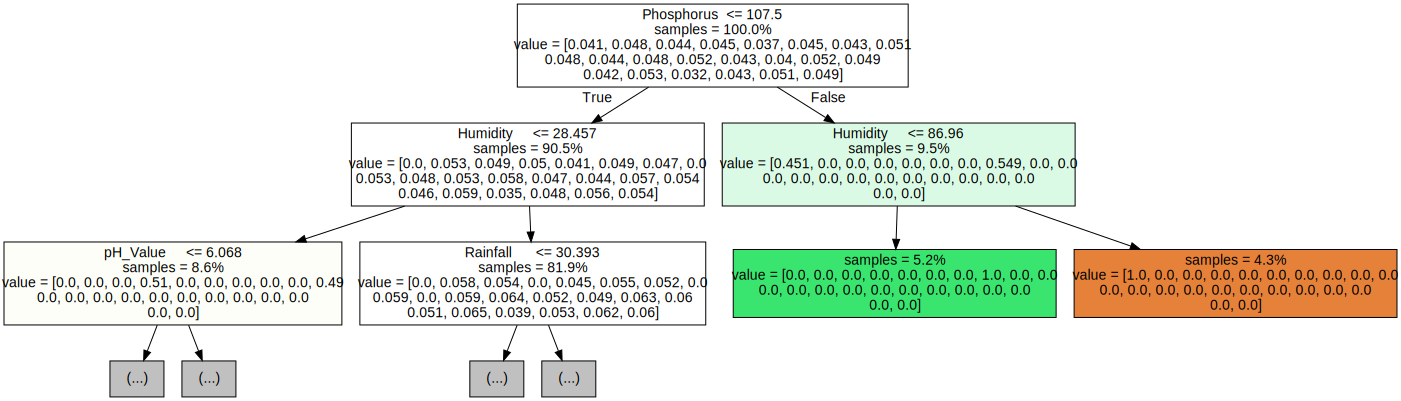

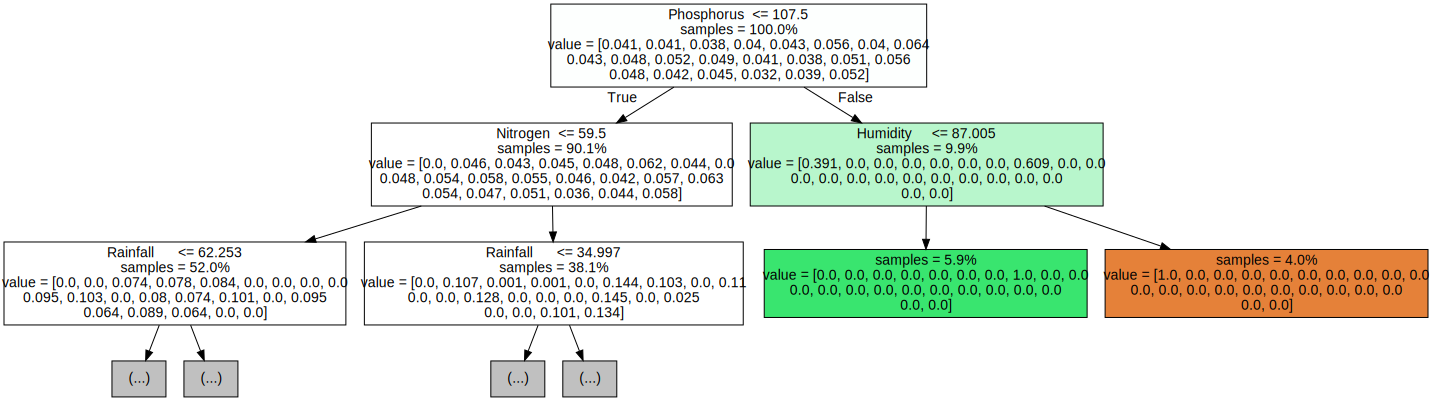

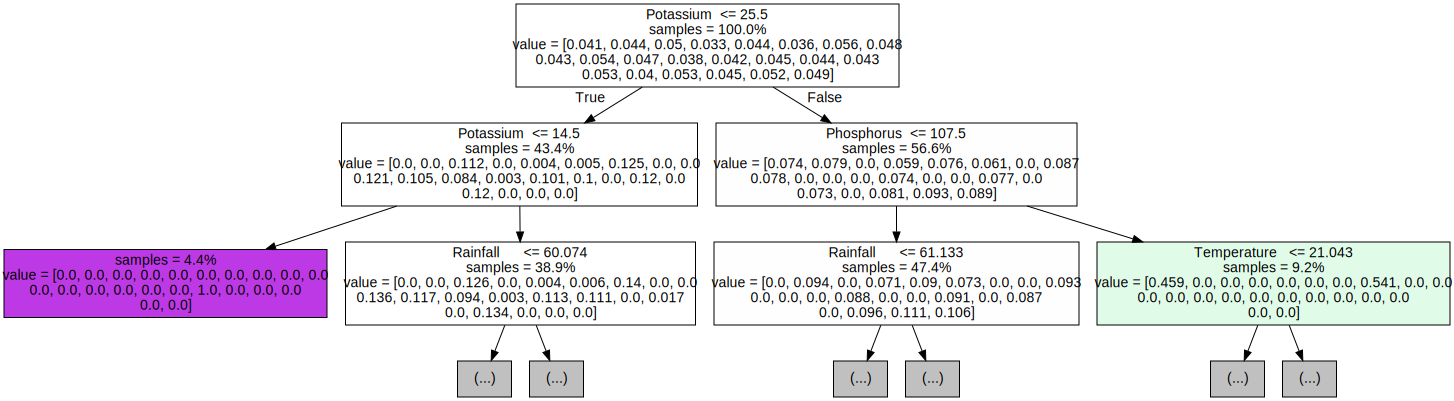

In [36]:
#Visulizing 1st decision tree
for i in range(3):
    tree = RFC.estimators_[i]
    dot_data = export_graphviz(tree,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)


In [114]:
X_train.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725


In [117]:
# Accuracy of training dataset
y_training = RFC.predict(X_train)


In [118]:
accuracy_training = accuracy_score(y_train,y_training)

print(accuracy_training)

1.0


In [47]:
#CONFUSION MATRIX 
CM_RFC = confusion_matrix(y_test,y_pred)
dist = ConfusionMatrixDisplay(confusion_matrix=CM_RFC)
#dist.plot()

#STUPID 

In [57]:
precision_RFC_micro = precision_score(y_test,y_pred, average='micro')
precision_RFC_macro = precision_score(y_test,y_pred, average='macro')
precision_RFC_weighted = precision_score(y_test,y_pred, average='weighted')
print('precision_RFC:',precision_RFC_micro*100)
print('precision_RFC:',precision_RFC_macro*100)
print('precision_RFC:',precision_RFC_weighted*100)

precision_RFC: 99.31818181818181
precision_RFC: 99.25757575757575
precision_RFC: 99.37348484848485


In [59]:
# Recall
recall_RFC_micro = recall_score(y_test,y_pred, average='micro')
recall_RFC_macro = recall_score(y_test,y_pred, average='macro')
recall_RFC_weighted = recall_score(y_test,y_pred, average='weighted')
print('recall_RFC:',recall_RFC_micro*100)
print('recall_RFC:',recall_RFC_macro*100)
print('recall_RFC:',recall_RFC_weighted*100)

recall_RFC: 99.31818181818181
recall_RFC: 99.33213716108455
recall_RFC: 99.31818181818181


<Axes: >

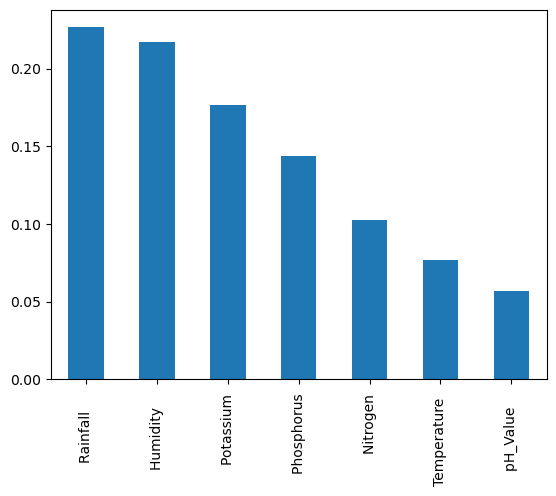

In [61]:
# Feature importance 
feature_importances = pd.Series(RFC.feature_importances_,index=X_train.columns).sort_values(ascending=False)

feature_importances.plot.bar()

In [107]:
# METRIX 
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       1.00      1.00      1.00        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       1.00      1.00      1.00        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.92      1.00      0.96        23
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       1.00      1.00      1.00        11
       Maize       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      1.00      1.00        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1.00        14
      Papaya       1.00    

I think the dataset is to small for RFC to train on but the model is not overfitted as it is doing great on validation set